### **Software Defects Prediction:**

The data set we'll be using is: https://www.kaggle.com/competitions/playground-series-s3e23/data

* The dataset for this competition (both train and test) was generated from a deep learning model trained on the `Software Defects Dataset`. 
* Feature distributions are close to, but not exactly the same, as the original.

`Original Software Defects Dataset:` https://www.kaggle.com/datasets/semustafacevik/software-defect-prediction/data
* This dataset is part of the PROMISE repository, a collection of publicly available datasets released by NASA in 2004 to promote the development of *repeatable, verifiable, refutable, and improvable* predictive models in software engineering. Its purpose is to support research in building robust models for software defect prediction and related areas, encouraging transparency and reproducibility in software engineering studies.

  * The dataset is based on features extracted using McCabe and Halstead metrics, which analyze source code. Developed in the 1970s, these metrics aim to objectively measure code characteristics that influence software quality.
  * `McCabe` proposed that code with more complex pathways is more error-prone. His metrics focus on analyzing the control flow of a code module to assess its complexity and identify potential problem areas.

  * `Halstead` suggested that code readability plays a significant role in fault proneness. His metrics estimate cognitive complexity by quantifying concepts in a module, such as the number of unique operators and operands.

### **Data Download and Extraction**


Set up Kaggle API token before hand


In [3]:
!powershell kaggle competitions download -c playground-series-s3e23

playground-series-s3e23.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!powershell tar -tf playground-series-s3e23.zip 



sample_submission.csv
test.csv
train.csv


In [5]:
!powershell tar -xf playground-series-s3e23.zip -C "C:\Users\helix\Desktop\VSCode.PC\DATA3402.Fall.2024\Labs"


### **Data Loading/Looking**

In [6]:
!dir /O:S "C:\Users\helix\Desktop\VSCode.PC\DATA3402.Fall.2024\Labs"

 Volume in drive C is SDD
 Volume Serial Number is 8029-125B

 Directory of C:\Users\helix\Desktop\VSCode.PC\DATA3402.Fall.2024\Labs

12/11/2024  03:48 AM    <DIR>          .
12/11/2024  03:48 AM    <DIR>          ..
12/01/2024  08:35 PM    <DIR>          Lab.9
09/06/2024  11:03 PM    <DIR>          Lab.1
09/09/2024  08:39 PM    <DIR>          Lab.2
09/09/2024  08:39 PM    <DIR>          Lab.3
10/25/2024  02:39 PM    <DIR>          Lab.4
10/25/2024  02:39 PM    <DIR>          Lab.5
10/25/2024  02:39 PM    <DIR>          Lab.6
12/01/2024  08:35 PM    <DIR>          Lab.7
12/01/2024  08:35 PM    <DIR>          Lab.8
12/10/2024  02:59 AM               991 outlier_summary.csv
09/25/2023  04:04 PM           746,273 sample_submission.csv
12/11/2024  03:40 AM         1,076,614 Kaggle Tabular Data.ipynb
09/25/2023  04:04 PM         5,990,715 playground-series-s3e23.zip
09/25/2023  04:04 PM         6,962,885 test.csv
09/25/2023  04:04 PM        10,922,789 train.csv
               6 File(s)     

#### Loading the CSV's into pandas


In [7]:
import pandas as pd

# CSV Files as objects
test = r"C:\Users\helix\Desktop\VSCode.PC\DATA3402.Fall.2024\Labs\test.csv"
train = r"C:\Users\helix\Desktop\VSCode.PC\DATA3402.Fall.2024\Labs\train.csv"
sample_submission = r"C:\Users\helix\Desktop\VSCode.PC\DATA3402.Fall.2024\Labs\sample_submission.csv"

# Loading the CSV's into DataFrames
df_test = pd.read_csv(test)
df_train = pd.read_csv(train)
df_sample = pd.read_csv(sample_submission)

#### Looking at each Dataframe


In [8]:
# Show all columns when displaying the dataframe
pd.set_option("display.max_columns", None)  # None means no column limit
pd.set_option("display.width", 1000) # Number represents maximum number of characters in a single row

In [9]:
print(df_sample.head())

       id  defects
0  101763      0.5
1  101764      0.5
2  101765      0.5
3  101766      0.5
4  101767      0.5


In [10]:
print(df_test.head())

       id    loc  v(g)  ev(g)  iv(g)      n        v     l      d      i          e     b        t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount
0  101763   33.0   5.0    1.0    4.0  144.0   824.82  0.04  26.96  30.05   22636.74  0.27  1257.60      30          0        3                  0     21.0       23.0      87.0        57.0          9.0
1  101764   27.0   8.0    8.0    2.0  125.0   646.24  0.04  22.82  27.22   14482.46  0.22   804.58      23          0        2                  0     18.0       19.0      70.0        49.0         15.0
2  101765  130.0  11.0    7.0   10.0  545.0  3831.40  0.02  48.15  66.17  116160.08  1.28  6453.34      99          9       17                  1     26.0       53.0     333.0       244.0         21.0
3  101766   65.0   7.0    1.0    7.0  156.0   855.71  0.06  17.23  49.89   16135.47  0.29   896.42      45          8       10                  0     15.0       26.0      88.0        60.0         

In [11]:
print(df_train.head())

   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e     b       t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  defects
0   0  22.0   3.0    1.0    2.0  60.0  278.63  0.06  19.56  14.25  5448.79  0.09  302.71      17          1        1                  0     16.0        9.0      38.0        22.0          5.0    False
1   1  14.0   2.0    1.0    2.0  32.0  151.27  0.14   7.00  21.11   936.71  0.05   52.04      11          0        1                  0     11.0       11.0      18.0        14.0          3.0    False
2   2  11.0   2.0    1.0    2.0  45.0  197.65  0.11   8.05  22.76  1754.01  0.07   97.45       8          0        1                  0     12.0       11.0      28.0        17.0          3.0    False
3   3   8.0   1.0    1.0    1.0  23.0   94.01  0.19   5.25  17.86   473.66  0.03   26.31       4          0        2                  0      8.0        6.0      16.0         7.0          1.0     True


#### Focusing on the training dataframe

In [12]:
# Display column names and data types
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

* 23 columns
* 101763 entries/rows
* dtypes: bool(1), float64(17), int64(5)

#### Ensuring each column has no strings/categorical features

In [13]:
for col in df_train.columns: # Iterate through each column
    value_types = df_train[col].apply(type).value_counts() # Apply the type() function to every value in the column and keeps count
    print(f"Column: {col} | Types: {', '.join([f'{k.__name__}({v})' for k, v in value_types.items()])}") # Formatted output, returning a tuple of the column, dtype, and total count

Column: id | Types: int(101763)
Column: loc | Types: float(101763)
Column: v(g) | Types: float(101763)
Column: ev(g) | Types: float(101763)
Column: iv(g) | Types: float(101763)
Column: n | Types: float(101763)
Column: v | Types: float(101763)
Column: l | Types: float(101763)
Column: d | Types: float(101763)
Column: i | Types: float(101763)
Column: e | Types: float(101763)
Column: b | Types: float(101763)
Column: t | Types: float(101763)
Column: lOCode | Types: int(101763)
Column: lOComment | Types: int(101763)
Column: lOBlank | Types: int(101763)
Column: locCodeAndComment | Types: int(101763)
Column: uniq_Op | Types: float(101763)
Column: uniq_Opnd | Types: float(101763)
Column: total_Op | Types: float(101763)
Column: total_Opnd | Types: float(101763)
Column: branchCount | Types: float(101763)
Column: defects | Types: bool(101763)


#### Creating a feature table to categorize the data, using built-in pandas functions.

In [14]:
# Function to categorize features
def describe_features(df):
    features = []

    for col in df.columns:
        if pd.api.types.is_bool_dtype(df[col]):  # Boolean Type
            feature_type = "Boolean"
            value_description = "False to True"
        elif pd.api.types.is_numeric_dtype(df[col]):  # Numerical Type
            feature_type = "Numerical"
            value_description = f"{df[col].min()} to {df[col].max()}" # Range using Min and Max
        else:
            feature_type = "Other"
            value_description = "N/A"

        # Count unique values
        unique_values_count = df[col].nunique()

        # Append feature details
        features.append({"Feature": col, 
                         "Type": feature_type, 
                         "Values Range": value_description, 
                         "Unique Values": unique_values_count
                         })


    return pd.DataFrame(features)

# Generate the feature table
feature_table = describe_features(df_train)

# Display the feature table
print(feature_table)


              Feature       Type        Values Range  Unique Values
0                  id  Numerical         0 to 101762         101763
1                 loc  Numerical       1.0 to 3442.0            378
2                v(g)  Numerical        1.0 to 404.0            106
3               ev(g)  Numerical        1.0 to 165.0             71
4               iv(g)  Numerical        1.0 to 402.0             84
5                   n  Numerical       0.0 to 8441.0            836
6                   v  Numerical     0.0 to 80843.08           4515
7                   l  Numerical          0.0 to 1.0             55
8                   d  Numerical        0.0 to 418.2           3360
9                   i  Numerical       0.0 to 569.78           5171
10                  e  Numerical  0.0 to 16846621.12           8729
11                  b  Numerical        0.0 to 26.95            315
12                  t  Numerical    0.0 to 935923.39           8608
13             lOCode  Numerical           0 to 

#### Checking for missing values (NaN or None)

In [15]:
print("Missing values (NaN/None):")
print(df_train.isnull().sum())

Missing values (NaN/None):
id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


### **Checking for Outliers**

#### What Is an Outlier?
* An outlier is a data point that is significantly different from the rest of the data in a dataset. 
* In the context of this software defect dataset, outliers represent either:

  * Halstead Metrics: Extremely Lengthy code, repetitive/redundant code, High # of characters, operators, & operands
  * McCabe Metrics: Extremely Complex code (Nested statments and loops) 


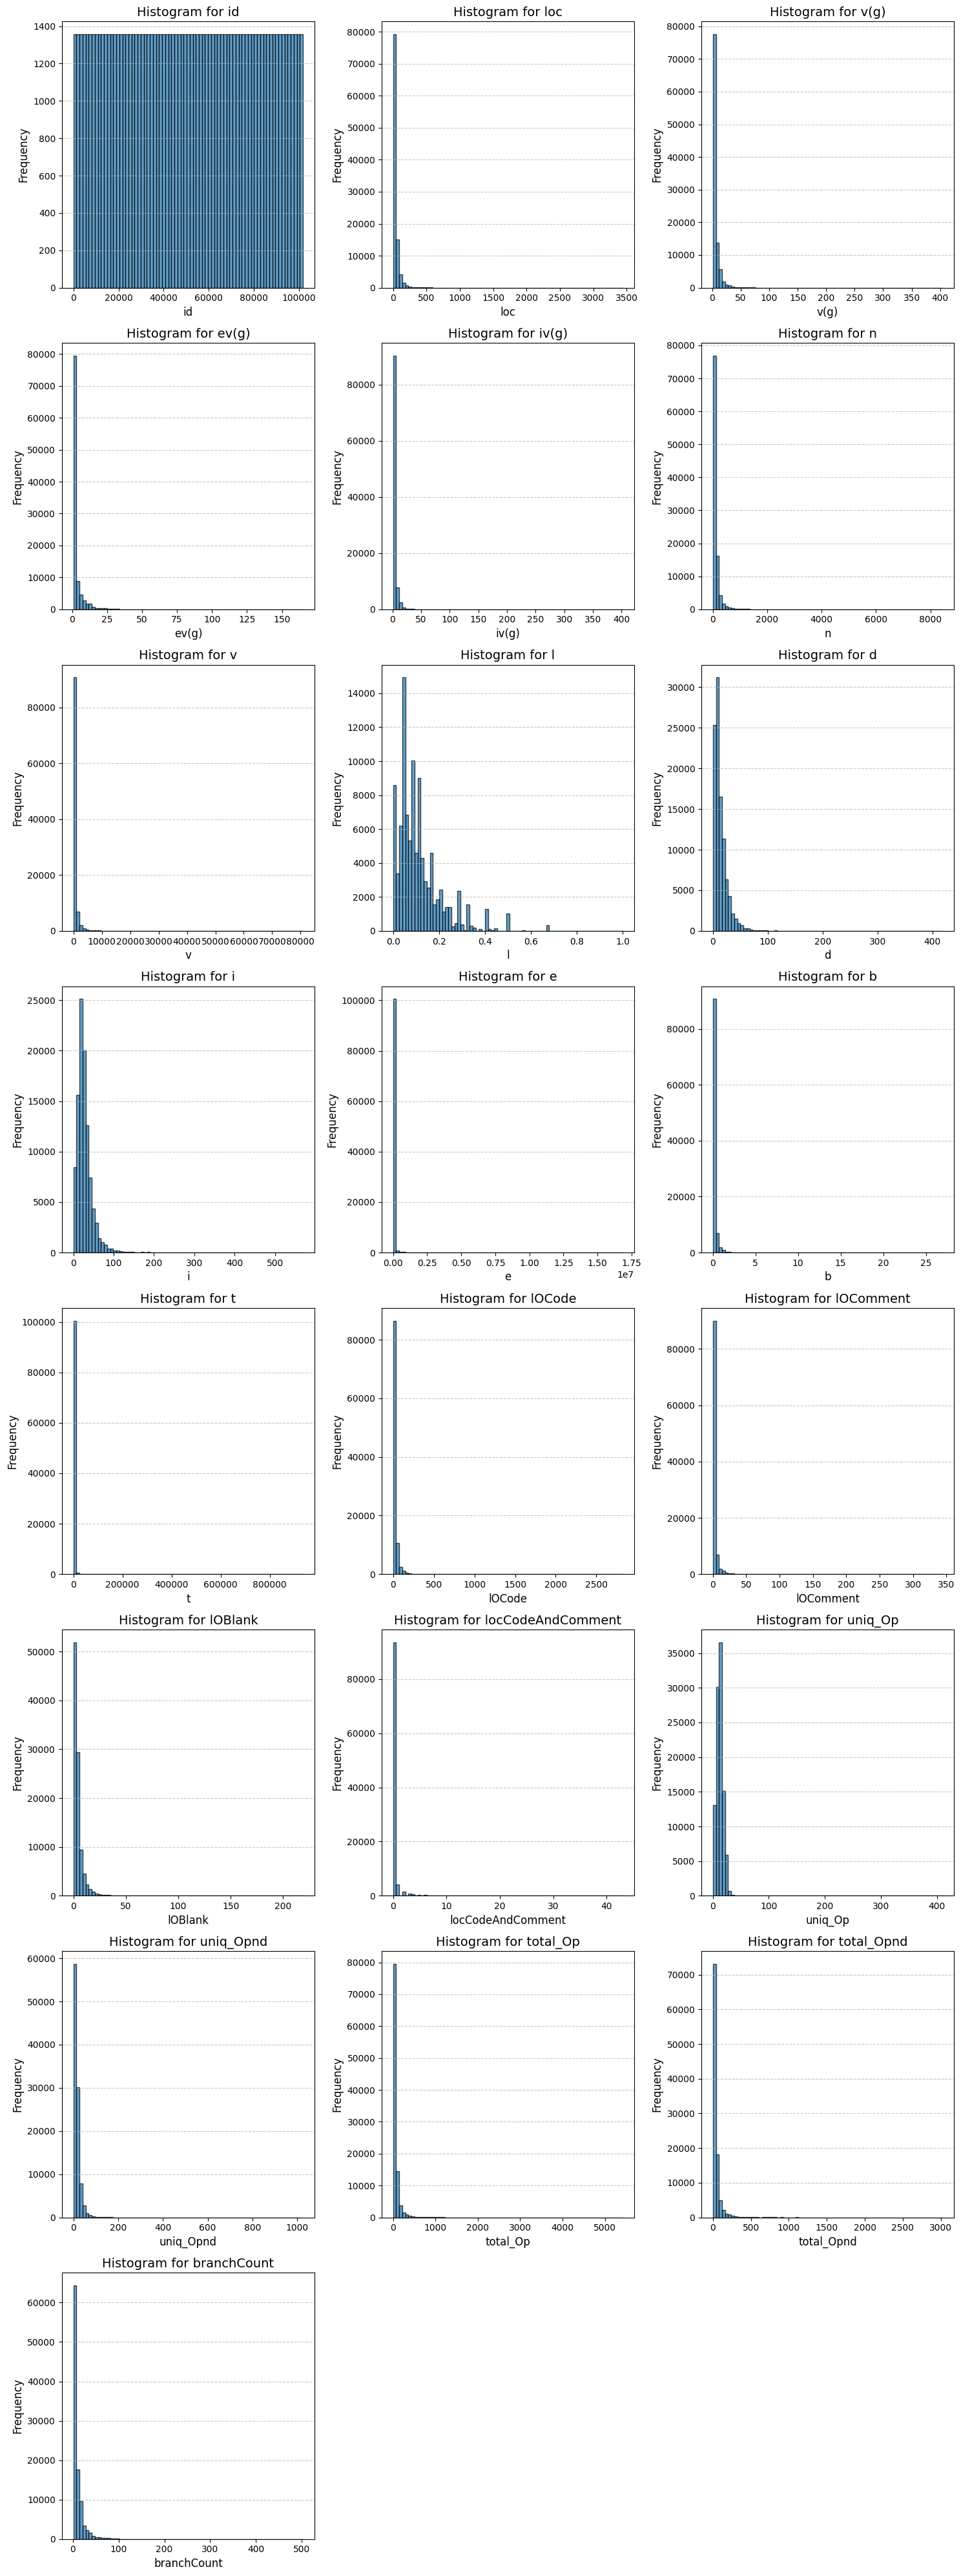

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define numerical columns
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

# Create subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Define rows dynamically for 3 columns per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Adjust size dynamically
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through columns and plot each histogram
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df_train[col].plot(kind='hist', bins=75, edgecolor='k', alpha=0.7, ax=ax)
    ax.set_title(f"Histogram for {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Same graph with logarithmic scale turned on

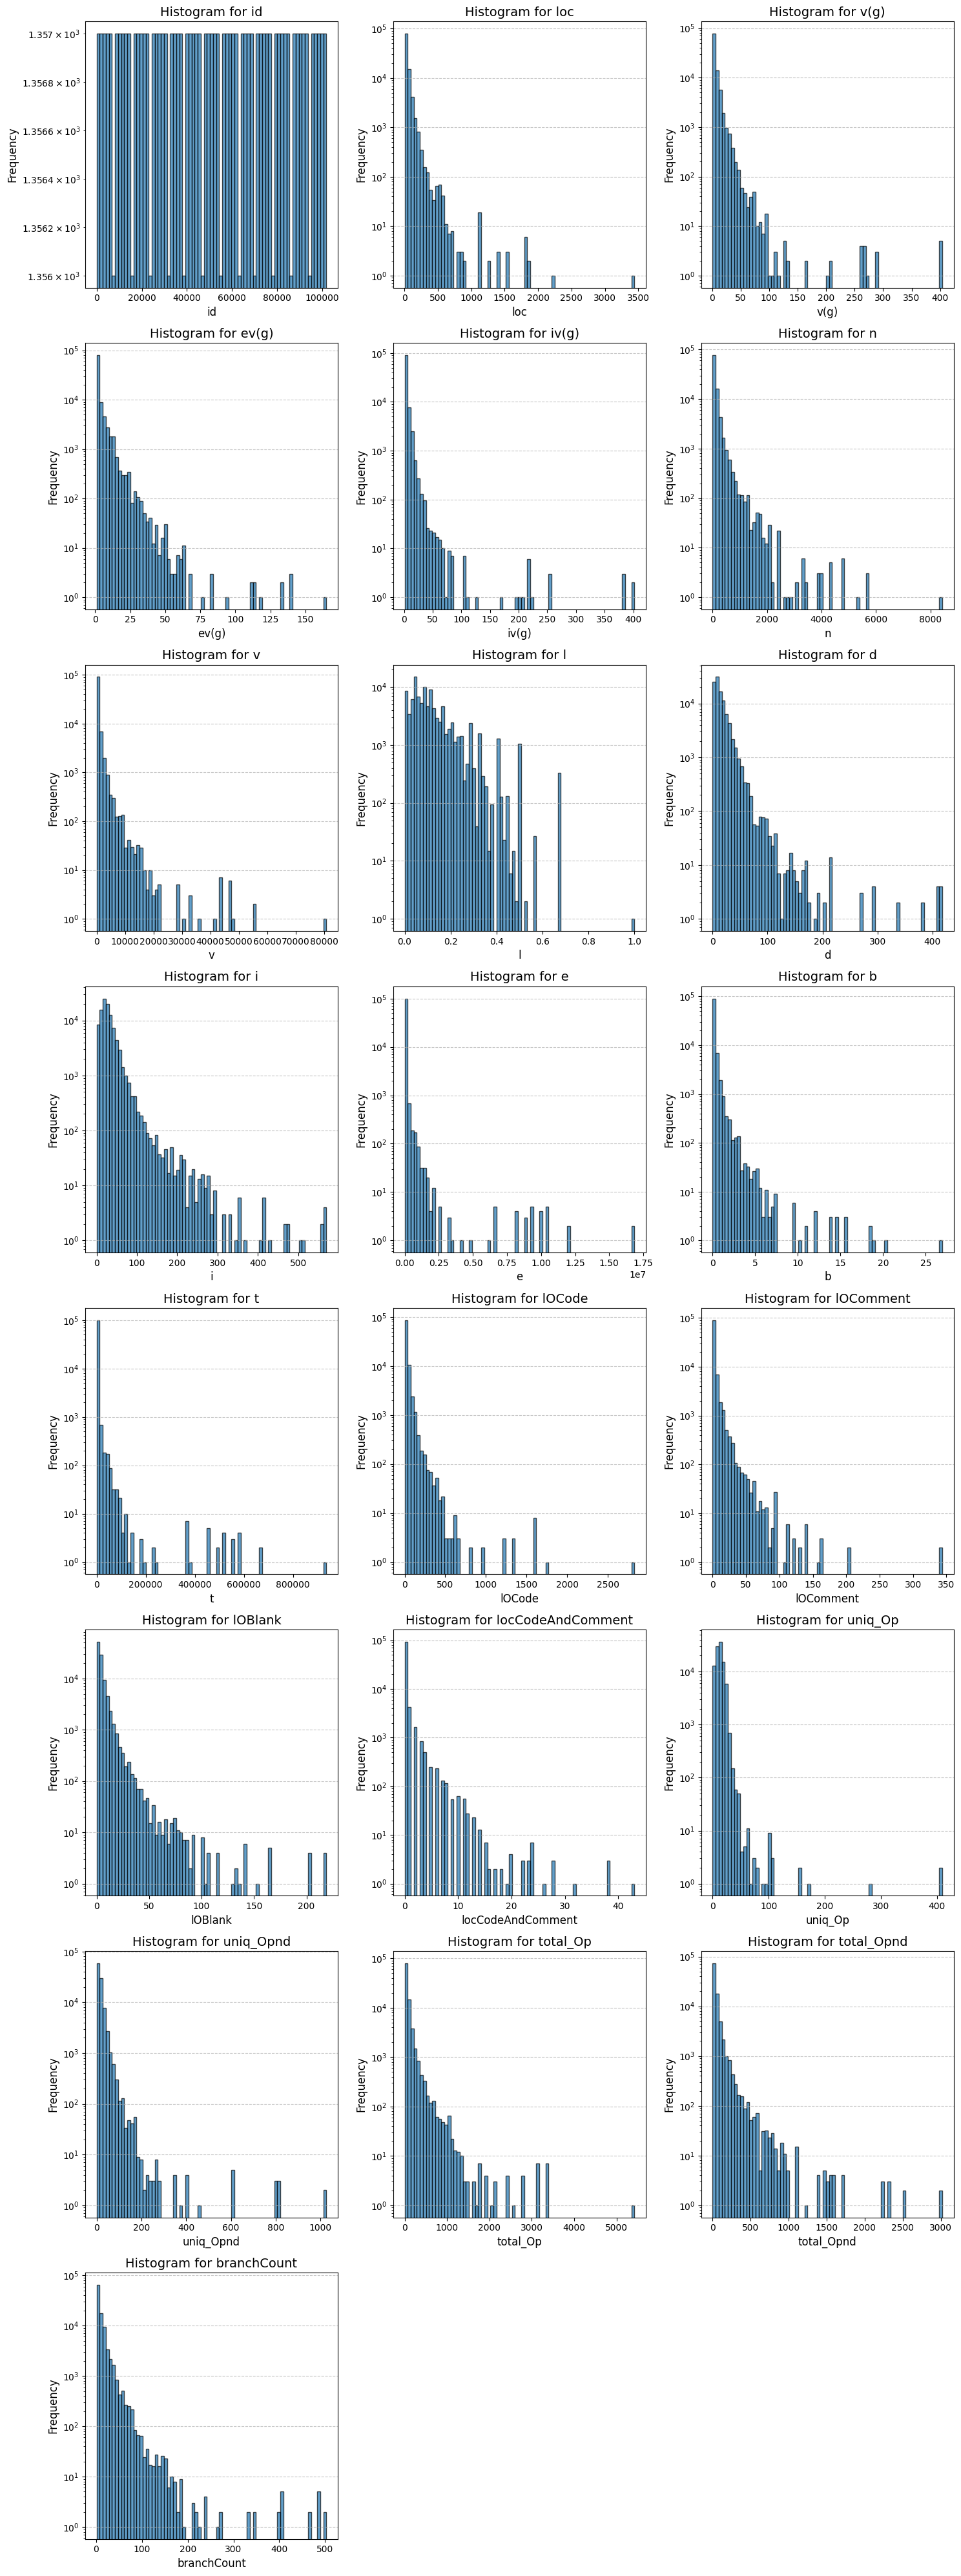

In [17]:
# Setting up subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 
axes = axes.flatten() 

# Loop through columns and plot each histogram
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df_train[col].plot(kind='hist', bins=75, edgecolor='k', alpha=0.7, log=True, ax=ax)
    ax.set_title(f"Histogram for {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Is there a class Imbalance?

defects
False    78699
True     23064
Name: count, dtype: int64
defects
False    77.335574
True     22.664426
Name: proportion, dtype: float64


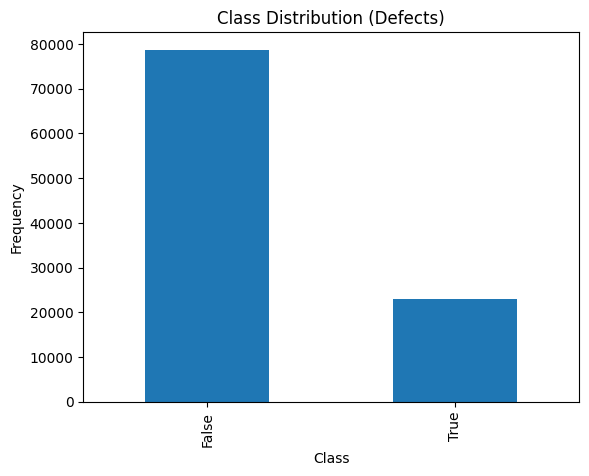

In [18]:
# Check the distribution of the target variable
class_counts = df_train['defects'].value_counts()
print(class_counts)

# Calculate percentages
class_percentages = df_train['defects'].value_counts(normalize=True) * 100
print(class_percentages)

# Visualize the class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title("Class Distribution (Defects)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


Possibly. While the `False` class has a clear majority of entries, representing non-defective software (i.e., working modules), this distribution aligns with real-world expectations. However, the presence of such a class imbalance might affect the machine learning model's performance, particularly in detecting the minority `True` class (defective software). To ensure this does not negatively impact the model, we need to carefully analyze and mitigate potential issues with False Negatives, as missing defects could have serious consequences.


* It is clear however that our `target variable` is categorical (binary:true/false) meaning this is a **`classification problem.`**

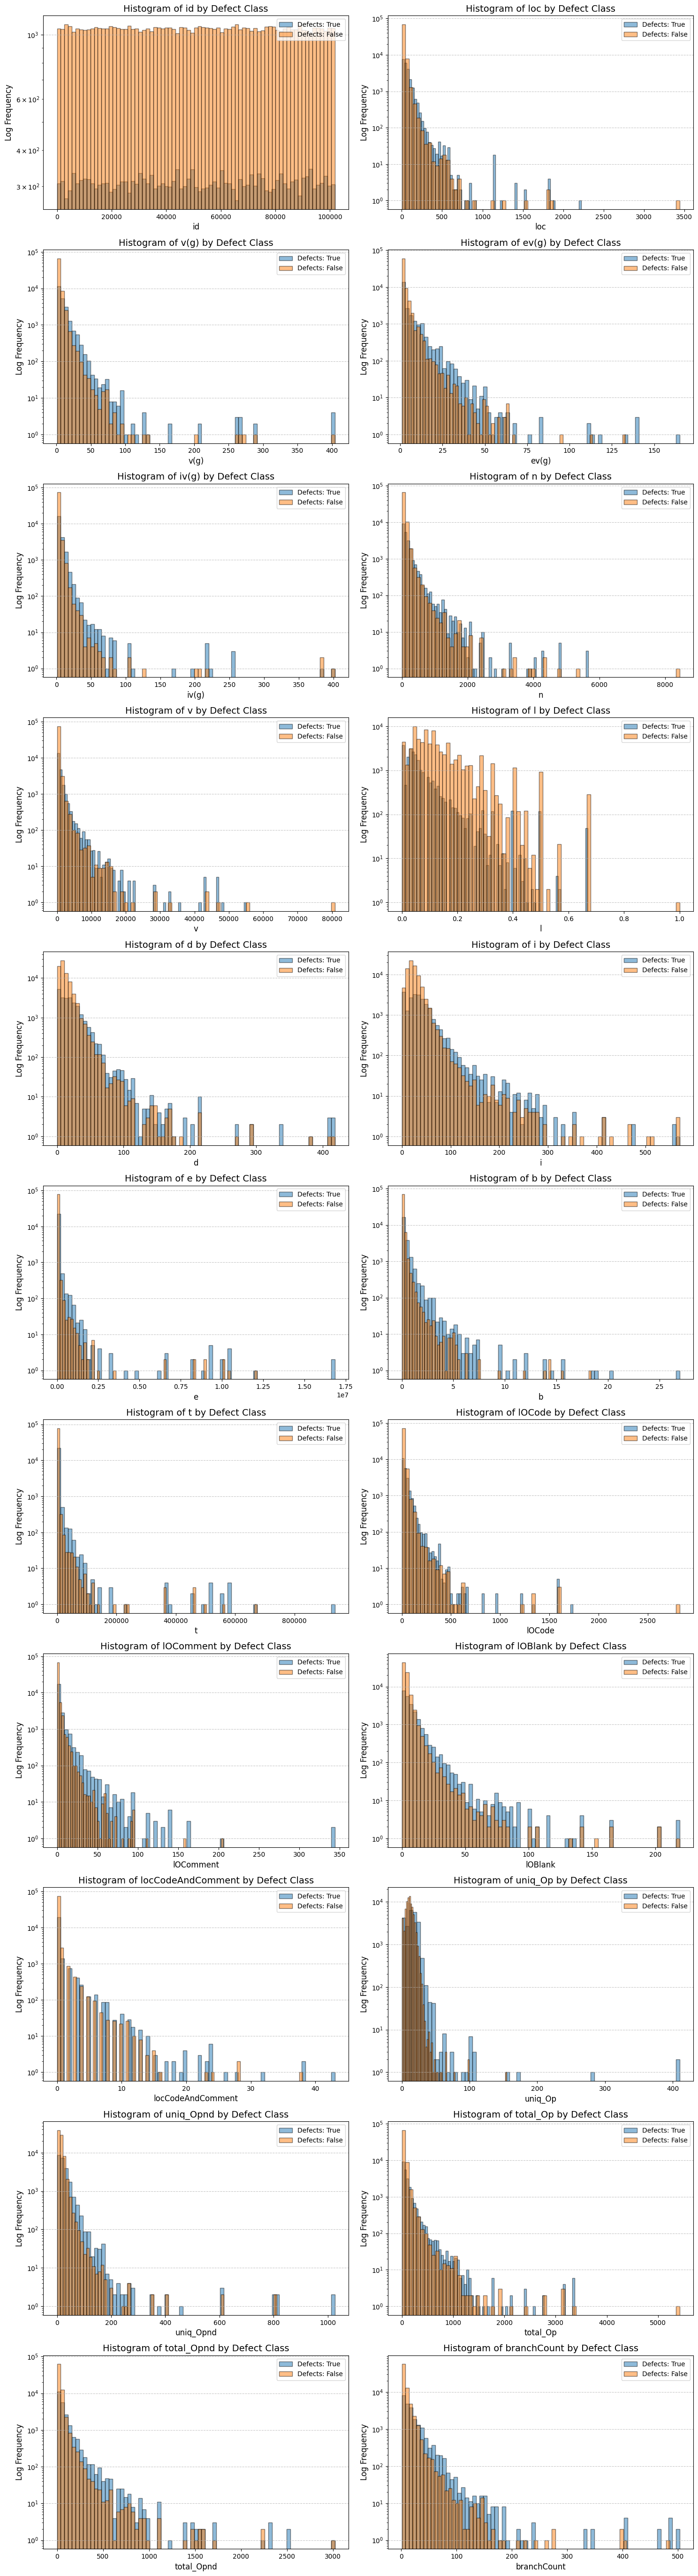

In [19]:
# Set up subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Define rows dynamically for 2 columns per row
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))  # Adjust figure size dynamically
axes = axes.flatten()  # Flatten axes for easier indexing

# Compare histograms for each numerical column split by defect class
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    
    # Plot histograms for each defect class
    for defect_class in [True, False]:
        df_train[df_train['defects'] == defect_class][col].plot(
            kind='hist',
            bins=75,
            alpha=0.5,
            label=f'Defects: {defect_class}',
            edgecolor='k',
            ax=ax,
            log=True  # Use logarithmic scale for the histogram
        )
    
    # Add labels, title, and legend
    ax.set_title(f"Histogram of {col} by Defect Class", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Log Frequency", fontsize=12)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



Based on visual and interpretive analysis, these features stand out:
1. **`IOComment`**: Line commenting patterns.
2. **`b`**: Halstead bugs
3. **`ev(g)`**: Essential complexity (simpler modules dominate non-defective cases).
4. **`e`**: Halstead effort (clear separation in upper ranges).
5. **`t`**: Time estimator (correlated with effort).
6. **`uniq_Op`**: Unique operators (complexity indicator).
7. **`uniq_Opnd`**: Unique operands (complexity and variability).


In [20]:
print(df_train.describe())

                  id            loc           v(g)          ev(g)          iv(g)              n              v              l              d              i             e              b              t         lOCode      lOComment        lOBlank  locCodeAndComment        uniq_Op      uniq_Opnd       total_Op     total_Opnd    branchCount
count  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  1.017630e+05  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000      101763.000000  101763.000000  101763.000000  101763.000000  101763.000000  101763.000000
mean    50881.000000      37.347160       5.492684       2.845022       3.498826      96.655995     538.280956       0.111634      13.681881      27.573007  2.085359e+04       0.179164    1141.357982      22.802453       1.773945       3.979865           0.196604      11.896131      15.596671      57.628116      39.24969

## Data Cleaning

Drop the 'id' column from the dataframe

In [21]:
df_train = df_train.drop(columns=['id'])
print(df_train.head())


    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e     b       t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  defects
0  22.0   3.0    1.0    2.0  60.0  278.63  0.06  19.56  14.25  5448.79  0.09  302.71      17          1        1                  0     16.0        9.0      38.0        22.0          5.0    False
1  14.0   2.0    1.0    2.0  32.0  151.27  0.14   7.00  21.11   936.71  0.05   52.04      11          0        1                  0     11.0       11.0      18.0        14.0          3.0    False
2  11.0   2.0    1.0    2.0  45.0  197.65  0.11   8.05  22.76  1754.01  0.07   97.45       8          0        1                  0     12.0       11.0      28.0        17.0          3.0    False
3   8.0   1.0    1.0    1.0  23.0   94.01  0.19   5.25  17.86   473.66  0.03   26.31       4          0        2                  0      8.0        6.0      16.0         7.0          1.0     True
4  11.0   2.0    1.0

One-hot encoding of Defect Column

In [22]:
df_train['defects'] = df_train['defects'].astype(int)
print(df_train.head())



    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e     b       t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  defects
0  22.0   3.0    1.0    2.0  60.0  278.63  0.06  19.56  14.25  5448.79  0.09  302.71      17          1        1                  0     16.0        9.0      38.0        22.0          5.0        0
1  14.0   2.0    1.0    2.0  32.0  151.27  0.14   7.00  21.11   936.71  0.05   52.04      11          0        1                  0     11.0       11.0      18.0        14.0          3.0        0
2  11.0   2.0    1.0    2.0  45.0  197.65  0.11   8.05  22.76  1754.01  0.07   97.45       8          0        1                  0     12.0       11.0      28.0        17.0          3.0        0
3   8.0   1.0    1.0    1.0  23.0   94.01  0.19   5.25  17.86   473.66  0.03   26.31       4          0        2                  0      8.0        6.0      16.0         7.0          1.0        1
4  11.0   2.0    1.0

Normailzing the data due to varying rangs across features and histograms showing skewed data with long tails.

In [23]:
from sklearn.preprocessing import MinMaxScaler

features = df_train.drop(columns=['defects'])  # Drop target column for normalization
target = df_train['defects']  # Save the target column

# Normalize the features
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the target column back to the normalized dataset
normalized_df = normalized_features.copy()
normalized_df['defects'] = target  # Re-add the target column

# Display the first few rows to verify
print(normalized_df.head())


        loc      v(g)  ev(g)     iv(g)         n         v     l         d         i         e         b         t    lOCode  lOComment   lOBlank  locCodeAndComment   uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  defects
0  0.006103  0.004963    0.0  0.002494  0.007108  0.003447  0.06  0.046772  0.025010  0.000323  0.003340  0.000323  0.006020   0.002907  0.004566                0.0  0.039024   0.008772  0.007011    0.007282     0.007968        0
1  0.003778  0.002481    0.0  0.002494  0.003791  0.001871  0.14  0.016738  0.037049  0.000056  0.001855  0.000056  0.003895   0.000000  0.004566                0.0  0.026829   0.010721  0.003321    0.004634     0.003984        0
2  0.002906  0.002481    0.0  0.002494  0.005331  0.002445  0.11  0.019249  0.039945  0.000104  0.002597  0.000104  0.002833   0.000000  0.004566                0.0  0.029268   0.010721  0.005166    0.005627     0.003984        0
3  0.002034  0.000000    0.0  0.000000  0.002725  0.001163  0.19  0.012554  0.03

Re-plot histograms for normalized data

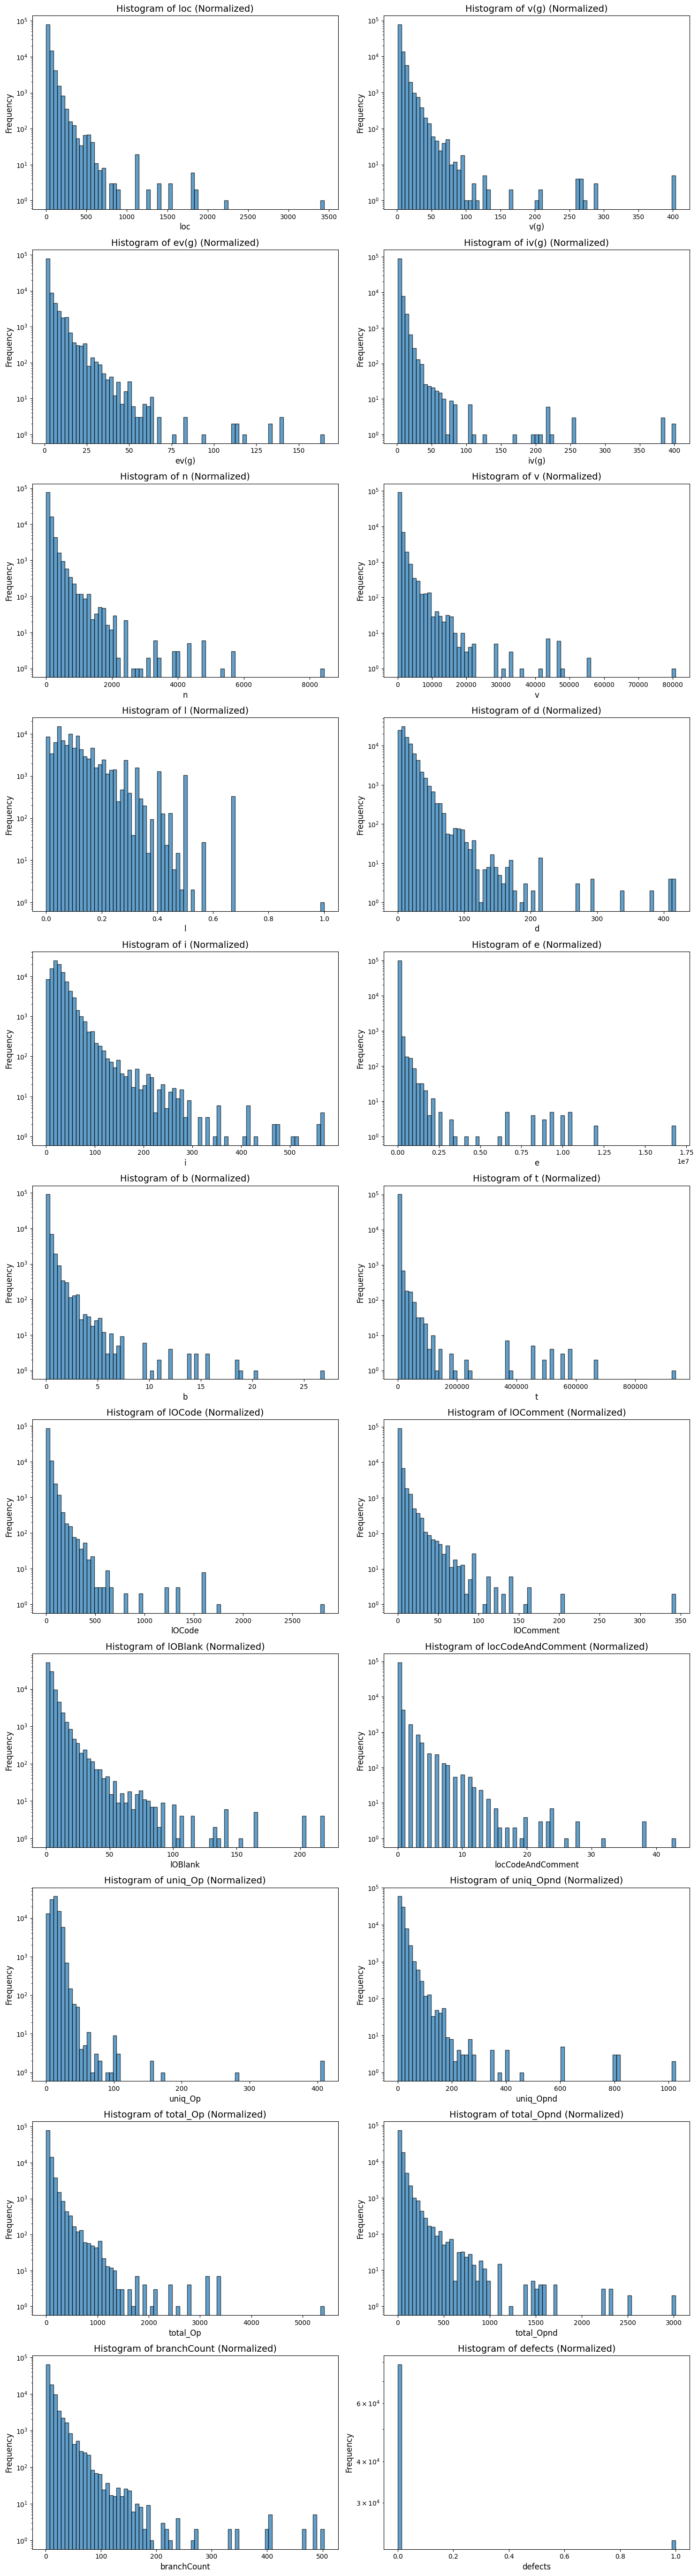

In [24]:
numerical_columns = [col for col in df_train.select_dtypes(include=[np.number]).columns if col != 'id']
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # 2 histograms per row
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df_train[col].plot(kind='hist', bins=75, edgecolor='k', alpha=0.7, log = True, ax=ax)
    ax.set_title(f"Histogram of {col} (Normalized)", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Splitting the Dataset

In [25]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df_train.drop(columns=['defects'])  # Features
y = df_train['defects']                # Target

# Split the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set: X_train: (71234, 21), y_train: (71234,)
Validation set: X_val: (15264, 21), y_val: (15264,)
Test set: X_test: (15265, 21), y_test: (15265,)


Training the algorithm with the RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Testing the algorithm on the 15% validation data

In [27]:
# Compute predictions on validation data
y_val_pred_rf = model.predict(X_val)  # Random Forest predictions
y_val_proba_rf = model.predict_proba(X_val)[:, 1]  # Random Forest probabilities for ROC-AUC

# Compute metrics for Random Forest
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_val, y_val_pred_rf)}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_proba_rf):.4f}")

Random Forest Performance:
Accuracy: 0.8066
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11805
           1       0.63      0.37      0.46      3459

    accuracy                           0.81     15264
   macro avg       0.73      0.65      0.67     15264
weighted avg       0.79      0.81      0.79     15264

ROC-AUC Score: 0.7711


Testing the algorithim on the 15% test data

In [28]:
test_predictions_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC or probabilities
test_predictions = model.predict(X_test)  # For binary predictions

# Evaluate performance on the test data
print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, test_predictions))
print(f"ROC-AUC Score: {roc_auc_score(y_test, test_predictions_proba):.4f}")

submission = pd.DataFrame({
    "Id": X_test.index,  
    "Defects": test_predictions 
})

# Save the submission file
submission_file = "testsubmission.csv"
submission.to_csv(submission_file, index=False)
print(f"Submission file created: {submission_file}")

Test Set Performance:
Accuracy: 0.8084
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88     11805
           1       0.64      0.36      0.46      3460

    accuracy                           0.81     15265
   macro avg       0.74      0.65      0.67     15265
weighted avg       0.79      0.81      0.79     15265

ROC-AUC Score: 0.7710
Submission file created: testsubmission.csv


Finally, using the trained model on the test.csv dataset

In [29]:
# Preprocess the test dataset
df_test_preprocessed = df_test.copy()
df_test_preprocessed = df_test_preprocessed.drop(columns=["id"], errors="ignore")

# Predict on the test dataset
predictions = model.predict(df_test_preprocessed)

# Save the predictions for submission
submission = pd.DataFrame({
    "Id": df_test["id"],  
    "Defects": predictions
})
submission.to_csv("submission.csv", index=False)

print("Predictions saved to submission.csv")


Predictions saved to submission.csv
